In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis of Indian Startup Boom

In [2]:

isb_data = pd.read_csv('india_startup.csv')

In [3]:

isb_data.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","3,50,00,000",Series B,Dec-21
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"4,00,00,000",NaN,Dec-21
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","4,00,00,000",Series B,Dec-21
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"5,00,00,000",NaN,Dec-21
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"49,00,000",Series A,Dec-21


In [4]:
isb_data.shape

(1209, 10)

In [5]:

isb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   Headquarters   1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founder/s      1205 non-null   object 
 6   Investor/s     1147 non-null   object 
 7   Amount         1061 non-null   object 
 8   Stage          775 non-null    object 
 9   Date           1209 non-null   object 
dtypes: float64(1), object(9)
memory usage: 94.6+ KB


All columns except 'Founded' column are non-numerical and 'Founded' is an year column

In [6]:

isb_data.isna().sum()

Company/Brand      0
Founded            1
Headquarters       1
Sector             0
What it does       0
Founder/s          4
Investor/s        62
Amount           148
Stage            434
Date               0
dtype: int64

Mostly missing data in 'Stage','Investor/s' columns.

In [7]:
isb_data['Amount'] = isb_data['Amount'].str.replace("$","")

C:\Users\124ab\AppData\Local\Temp/ipykernel_37464/2049451627.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  isb_data['Amount'] = isb_data['Amount'].str.replace("$","")


In [8]:
isb_data['Amount'] = isb_data['Amount'].str.replace(",","")

In [9]:
isb_data['Amount'] = isb_data['Amount'].astype(float)

In [10]:
# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme()

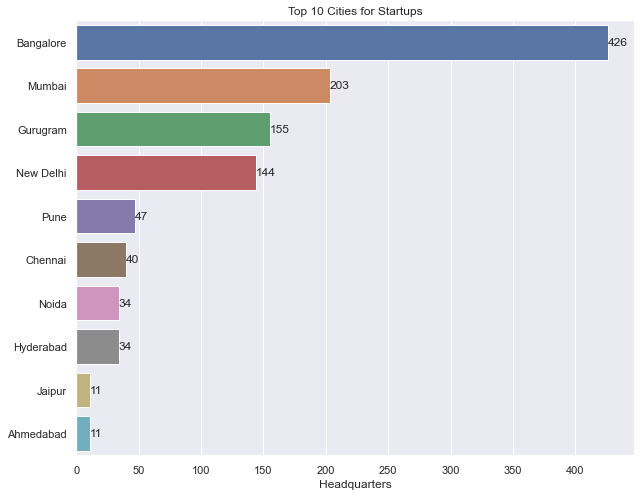

In [11]:
#Plotting histogram for no of startups city wise (Established Headquarters)
#Top 10 cities for startups
cities_top = pd.DataFrame(isb_data['Headquarters'].value_counts().sort_values(ascending = False))
cities_top = cities_top.head(10)

plt.figure(figsize = (10,8))
ax = sns.barplot(x = cities_top['Headquarters'], y = cities_top.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Cities for Startups')
plt.show()

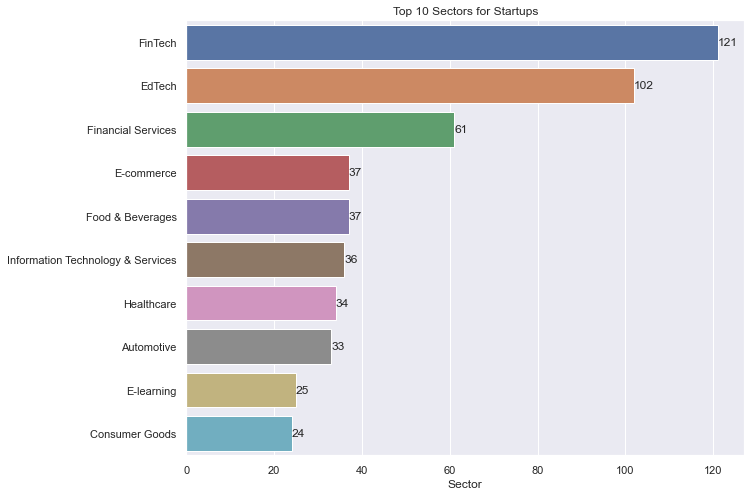

In [12]:
#Top 10 Sectors for Startups
sectors_top = pd.DataFrame(isb_data['Sector'].value_counts().sort_values(ascending = False))
sectors_top = sectors_top.head(10)

plt.figure(figsize = (10,8))
ax = sns.barplot(x = sectors_top['Sector'], y = sectors_top.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Sectors for Startups')
plt.show()

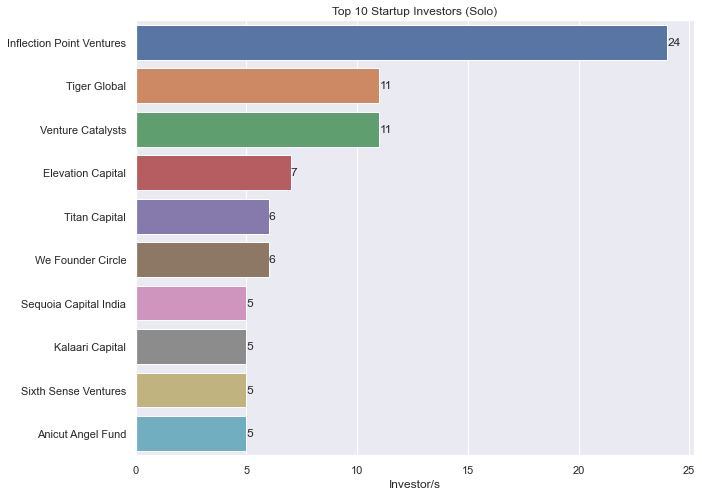

In [13]:
#Top 10 Startup Investors (Solo)
investors_top = pd.DataFrame(isb_data['Investor/s'].value_counts().sort_values(ascending = False))
investors_top = investors_top.head(10)

plt.figure(figsize = (10,8))
ax = sns.barplot(x = investors_top['Investor/s'], y = investors_top.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Startup Investors (Solo)')
plt.show()
#this chart needs to be corrected`

In [14]:
#Splitting Investors column
int_data = isb_data['Investor/s'].str.split(',', expand = True)
isb_data_final = pd.concat([isb_data, int_data],axis=1)
isb_data_final.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date,0,1,2,3,4,5
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Series B,Dec-21,Disrupt ADQ,QIC,None,None,None,None
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,NaN,Dec-21,Tiger Global,None,None,None,None,None
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,Series B,Dec-21,Valar Ventures,IA Ventures,None,None,None,None
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000.0,NaN,Dec-21,NaN,NaN,NaN,NaN,NaN,NaN
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,Series A,Dec-21,Sequoia Capital India,None,None,None,None,None


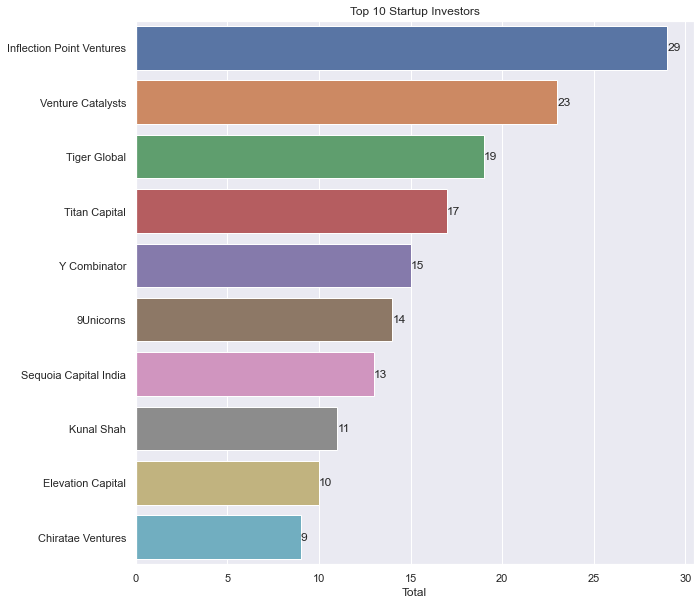

In [15]:
# top 10 Investors (Considering investor in groups also)
inv_data = isb_data_final[[0,1,2,3,4,5]].apply(pd.Series.value_counts)
inv_data = inv_data.fillna(0)
inv_data['Total'] = inv_data.sum(axis=1)
inv_data = inv_data.sort_values(by = 'Total',ascending=False)
inv_data_top = inv_data.head(10)

plt.figure(figsize = (10,10))
ax = sns.barplot(x = inv_data_top.Total, y = inv_data_top.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Startup Investors')
plt.show()

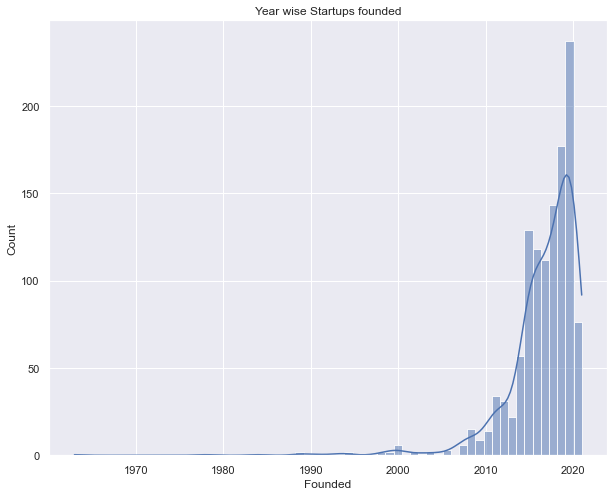

Maximum No of Startups founded in year 2020


In [16]:
# Startups count yearwise
plt.figure(figsize = (10,8))
sns.histplot(isb_data['Founded'], kde = True)
plt.title('Year wise Startups founded')
plt.show()

max_startups_year = round(isb_data['Founded'].value_counts().sort_values(ascending = False).idxmax())
print(f'Maximum No of Startups founded in year {max_startups_year}')

In [17]:
isb_data['Amount_C'] = isb_data['Amount']

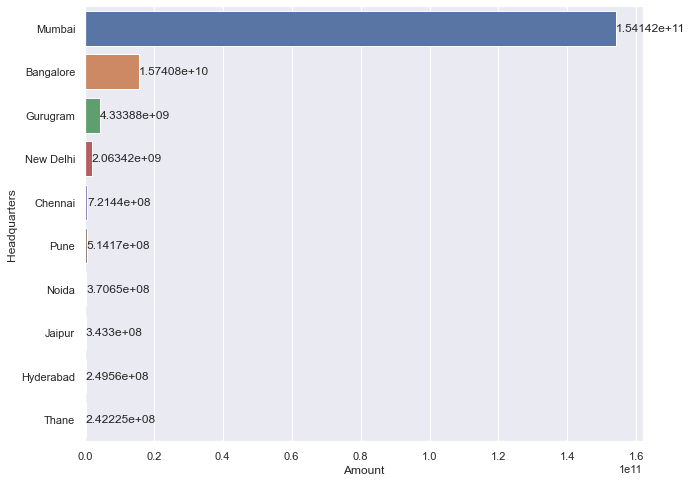

In [19]:
#Grouping data of based on headquarters
pd.set_option('display.float_format', lambda x: '%.0f' % x)
plt.figure(figsize = (10,8))
grouped_data = isb_data.groupby(by = 'Headquarters').sum().drop('Founded',axis=1).reset_index()
grouped_data_top = grouped_data.sort_values(by = 'Amount_C',ascending = False).head(10)

ax = sns.barplot(y = grouped_data_top['Headquarters'], x = grouped_data_top['Amount_C'])
ax.bar_label(ax.containers[0])
plt.xlabel('Amount')
plt.show()

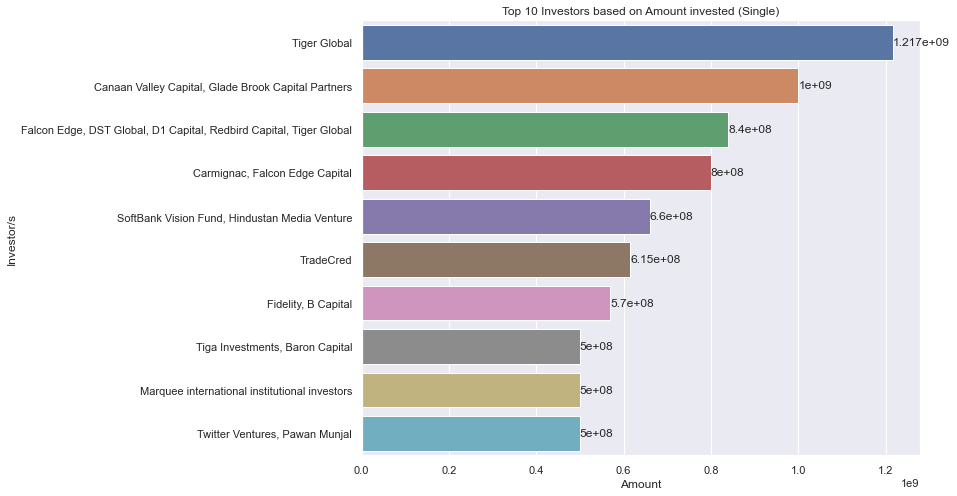

In [20]:
#Top 10 Investors based on Amount invested (Single)
plt.figure(figsize = (10,8))
grouped_inv_data = isb_data.groupby(by = 'Investor/s').sum().drop('Founded',axis=1).reset_index()
grouped_inv_data_top = grouped_inv_data.sort_values(by = 'Amount_C',ascending = False).head(10)

ax = sns.barplot(y = grouped_inv_data_top['Investor/s'], x = grouped_inv_data_top['Amount_C'])
ax.bar_label(ax.containers[0])
plt.xlabel('Amount')

plt.title('Top 10 Investors based on Amount invested (Single)')
plt.show()

## Summary
* Most of the startups are estabhlished in Bengaluru
* Most of the startups are belongs to 'Fintech' Sector
* Most of the Startups invested by Inflection Point Ventures
* Most of the funding amount recived for Startups in Mumbai (Ignored: Some text data present in the 'Amount' column, which are converted to NaN during numeric conversion.)